In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

plt.rcParams["font.family"] = "serif"

dataset = ["STK","TAO","HPC","EM","FC"] # will be added soon

In [2]:
def preprocessing(pathList):
    headerf = open(pathList[0]+".txt")
    header = headerf.readline()
    header = "\t".join(header.split())
    w=open("separated.csv",'w')
    w.write(header+"\n")
    for path in pathList:
        f=open(path+".txt",'r')
        i = -1
        for line in f.readlines():
            i += 1
            if (len(line.split())<9) or (i<1):
                continue
            tab_sep_line = "\t".join(line.split())
            w.write(tab_sep_line+"\n")

    w.close()
    dataframe = pd.read_csv(os.getcwd()+"/separated.csv", sep="\t")
    return dataframe   

In [3]:
df = preprocessing(dataset)
df.head()

,Dataset,Queryset,ChgQRatio,Method,Time,AvgMem,PeakMem,#Out,#OutQ
0,STK,STK_Q1,0.0,NAIVE,75.69,3.0,3.0,1235,1235
1,STK,STK_Q1,0.0,SOP,52.59,9.0,9.0,1235,1235
2,STK,STK_Q1,0.0,pMCSKY,59.03,6.0,7.0,1203,1203
3,STK,STK_Q1,0.0,OURS-Q,11.63,5.0,5.0,1235,1235
4,STK,STK_Q1,0.0,OURS-D,4.45,5.0,5.0,1235,1235


In [4]:


algo_color = {'NAIVE': 'black',
              'SOP': '#4BACC6',
              'pMCSKY': '#1F497D',
              'OURS-Q': '#F79646',
              'OURS-D': '#9BBB59',
              'OURS': '#C0504D'}

fontsize_Tick=10
fontsize_xLabel=20
fontsize_yLabel=20

algo_line = {'NAIVE': '-',
              'SOP': '-',
              'pMCSKY': '-',
              'OURS-Q': '--',
              'OURS-D': '--',
              'OURS': '-'}

basic_linewidth = 1.5
algo_linewidth = {'NAIVE': basic_linewidth,
                  'SOP': basic_linewidth,
                  'pMCSKY': basic_linewidth,
                  'OURS-Q': basic_linewidth/2,
                  'OURS-D': basic_linewidth/2,
                  'OURS': basic_linewidth}

In [37]:
a = ["Dataset"]\

a+list(algo_color.keys())

['Dataset', 'NAIVE', 'SOP', 'pMCSKY', 'OURS-Q', 'OURS-D', 'OURS']

In [38]:
graphdf = pd.DataFrame(index="Dataset", columns=list(algo_color.keys()))
for dataname in dataset:
    graphdf = pd.merge(graphdf, df.loc[(df["Dataset"]==dataname)&(df["Queryset"].str.contains(r"\_Q100$")) & (df['ChgQRatio']==0)].pivot(index="Dataset",columns="Method",values="Time"))
graphdf = graphdf[algo_color.keys()]

TypeError: Index(...) must be called with a collection of some kind, 'Dataset' was passed

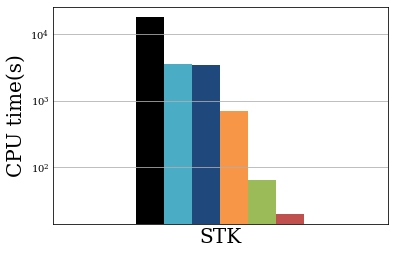

In [6]:
ax = graphdf.plot(kind='bar',color=algo_color.values())
# plt figure settings
ax.grid(b=True,which="major",axis='y')
ax.set_yscale("log")
ax.set_xlabel("")
ax.set_ylabel('CPU time(s)', fontsize=fontsize_xLabel)

# TODO: Put pattern in the bar graph

# remove ticks
ax.tick_params(axis ='both', which ='both', length = 0)
ax.tick_params(axis ='x', labelsize=fontsize_xLabel)
# rotate ticks
ax.tick_params(axis ='x', rotation = 0)
ax.get_legend().remove()
# color map for each bar

plt.savefig('asdf.pdf', bbox_inches='tight', format='pdf')
